In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('D:\Rishabh\coding\machine learning\employee_hiring\stackoverflow_cleaned.csv')
df

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73453,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73454,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73455,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73456,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


In [52]:
df['MainBranch'].unique()

array(['Dev', 'NotDev'], dtype=object)

In [58]:
df['Accessibility'].unique()

array(['No', 'Yes'], dtype=object)

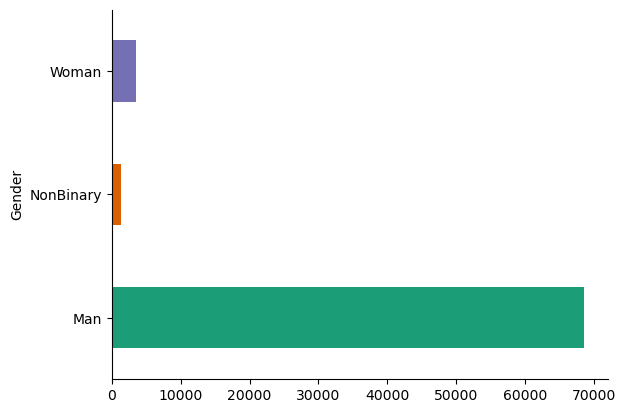

In [5]:
# @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73458 entries, 0 to 73457
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             73458 non-null  object 
 1   Accessibility   73458 non-null  object 
 2   EdLevel         73458 non-null  object 
 3   Employment      73458 non-null  int64  
 4   Gender          73458 non-null  object 
 5   MentalHealth    73458 non-null  object 
 6   MainBranch      73458 non-null  object 
 7   YearsCode       73458 non-null  int64  
 8   YearsCodePro    73458 non-null  int64  
 9   Country         73458 non-null  object 
 10  PreviousSalary  73458 non-null  float64
 11  HaveWorkedWith  73395 non-null  object 
 12  ComputerSkills  73458 non-null  int64  
 13  Employed        73458 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 7.8+ MB


In [7]:
missing_values = df.isna().sum()

print(missing_values)

Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64


In [8]:
df.drop(columns = 'HaveWorkedWith', inplace=True)

In [59]:
df.drop(columns='Accessibility', inplace=True)

In [10]:
df.dropna(inplace=True)

In [60]:
missing_values = df.isna().sum()

print(missing_values)

Age               0
EdLevel           0
Employment        0
Gender            0
MentalHealth      0
MainBranch        0
YearsCode         0
PreviousSalary    0
ComputerSkills    0
Employed          0
Continent         0
dtype: int64


In [13]:
df['Gender'].unique()

array(['Man', 'Woman', 'NonBinary'], dtype=object)

In [15]:
df['EdLevel'].unique()

array(['Master', 'Undergraduate', 'PhD', 'Other', 'NoHigherEd'],
      dtype=object)

In [ ]:
df['Country'].unique()

In [16]:
def segment_country(country):
    if country in ['United States of America', 'Canada', 'Mexico']:
        return 'NorthAmerica'
    elif country in ['United Kingdom of Great Britain and Northern Ireland', 'France', 'Germany', 'Spain', 'Italy', 'Portugal', 'Belgium', 'Netherlands', 'Austria', 'Switzerland', 'Denmark', 'Ireland', 'Norway', 'Sweden', 'Finland', 'Greece', 'Czech Republic', 'Slovakia', 'Hungary', 'Poland']:
        return 'Europe'
    elif country in ['Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru', 'Venezuela, Bolivarian Republic of...', 'Bolivia']:
        return 'South America'
    elif country in ['China', 'Japan', 'South Korea', 'Viet Nam', 'India', 'Sri Lanka', 'Pakistan', 'Bangladesh', 'Indonesia', 'Malaysia', 'Philippines', 'Taiwan', 'Thailand', 'Cambodia', 'Myanmar', 'Laos', 'Singapore', 'Hong Kong (S.A.R.)']:
        return 'Asia'
    elif country in ['Australia', 'New Zealand', 'Fiji', 'Papua New Guinea', 'Solomon Islands', 'Vanuatu', 'Samoa', 'Tonga']:
        return 'Australia'
    else:
        return 'Others'

df['Continent'] = df['Country'].apply(segment_country)

In [17]:
df.Continent.unique()

array(['Europe', 'NorthAmerica', 'Asia', 'Others', 'South America',
       'Australia'], dtype=object)

In [18]:
df.drop(columns = 'YearsCodePro', inplace=True)

In [19]:
df.drop(columns = "Country",inplace=True)

In [61]:
df.head()

,Age,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,PreviousSalary,ComputerSkills,Employed,Continent
0,<35,Master,1,Man,No,Dev,7,51552.0,4,0,Europe
1,<35,Undergraduate,1,Man,No,Dev,12,46482.0,12,1,Europe
2,<35,Master,1,Man,No,Dev,15,77290.0,7,0,Europe
3,<35,Undergraduate,1,Man,No,Dev,9,46135.0,13,0,NorthAmerica
4,>35,PhD,0,Man,No,NotDev,40,160932.0,2,0,Asia


In [23]:
df_target = df['Employed']

In [62]:
df_num = df.drop(columns=['Age','EdLevel','Gender','MentalHealth','MainBranch','Continent', 'Employed'])
df_cat = df[['Age','EdLevel','Gender','MentalHealth','MainBranch','Continent']]

print(df_cat.head(5))
print(df_num.head(5))

   Age        EdLevel Gender MentalHealth MainBranch     Continent
0  <35         Master    Man           No        Dev        Europe
1  <35  Undergraduate    Man           No        Dev        Europe
2  <35         Master    Man           No        Dev        Europe
3  <35  Undergraduate    Man           No        Dev  NorthAmerica
4  >35            PhD    Man           No     NotDev          Asia
   Employment  YearsCode  PreviousSalary  ComputerSkills
0           1          7         51552.0               4
1           1         12         46482.0              12
2           1         15         77290.0               7
3           1          9         46135.0              13
4           0         40        160932.0               2


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df_num)

In [26]:
df_num_scaled = pd.DataFrame(X, columns=df_num.columns)
df_num_scaled

,Employment,YearsCode,PreviousSalary,ComputerSkills
0,0.363827,-0.767539,-0.327337,-1.335884
1,0.363827,-0.235893,-0.429787,-0.202390
2,0.363827,0.083094,0.192751,-0.910824
3,0.363827,-0.554881,-0.436799,-0.060704
4,-2.748556,2.741324,1.882907,-1.619258
...,...,...,...,...
73453,0.363827,-0.767539,-0.539390,-0.060704
73454,0.363827,0.721069,0.954758,-0.344077
73455,0.363827,-1.086527,-0.202700,-0.202390
73456,0.363827,-0.980198,0.045442,0.222670


In [63]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_cat['Age'] = label_encoder.fit_transform(df_cat['Age'])
df_cat['EdLevel'] = label_encoder.fit_transform(df_cat['EdLevel'])
df_cat['Gender'] = label_encoder.fit_transform(df_cat['Gender'])
df_cat['MentalHealth'] = label_encoder.fit_transform(df_cat['MentalHealth'])
df_cat['MainBranch'] = label_encoder.fit_transform(df_cat['MainBranch'])
df_cat['Continent'] = label_encoder.fit_transform(df_cat['Continent'])

df_cat

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14804\1354881215.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Age'] = label_encoder.fit_transform(df_cat['Age'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14804\1354881215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['EdLevel'] = label_encoder.fit_transform(df_cat['EdLevel'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14804\1354881215.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,Age,EdLevel,Gender,MentalHealth,MainBranch,Continent
0,0,0,0,0,0,2
1,0,4,0,0,0,2
2,0,0,0,0,0,2
3,0,4,0,0,0,3
4,1,3,0,0,1,0
...,...,...,...,...,...,...
73453,0,4,0,0,0,2
73454,1,4,0,0,0,3
73455,0,4,0,0,0,4
73456,0,4,0,1,0,3


In [64]:
df_final = pd.concat([df_num_scaled, df_cat, df_target], axis=1)
df_final 

,Employment,YearsCode,PreviousSalary,ComputerSkills,Age,EdLevel,Gender,MentalHealth,MainBranch,Continent,Employed
0,0.363827,-0.767539,-0.327337,-1.335884,0,0,0,0,0,2,0
1,0.363827,-0.235893,-0.429787,-0.202390,0,4,0,0,0,2,1
2,0.363827,0.083094,0.192751,-0.910824,0,0,0,0,0,2,0
3,0.363827,-0.554881,-0.436799,-0.060704,0,4,0,0,0,3,0
4,-2.748556,2.741324,1.882907,-1.619258,1,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
73453,0.363827,-0.767539,-0.539390,-0.060704,0,4,0,0,0,2,1
73454,0.363827,0.721069,0.954758,-0.344077,1,4,0,0,0,3,1
73455,0.363827,-1.086527,-0.202700,-0.202390,0,4,0,0,0,4,1
73456,0.363827,-0.980198,0.045442,0.222670,0,4,0,1,0,3,1


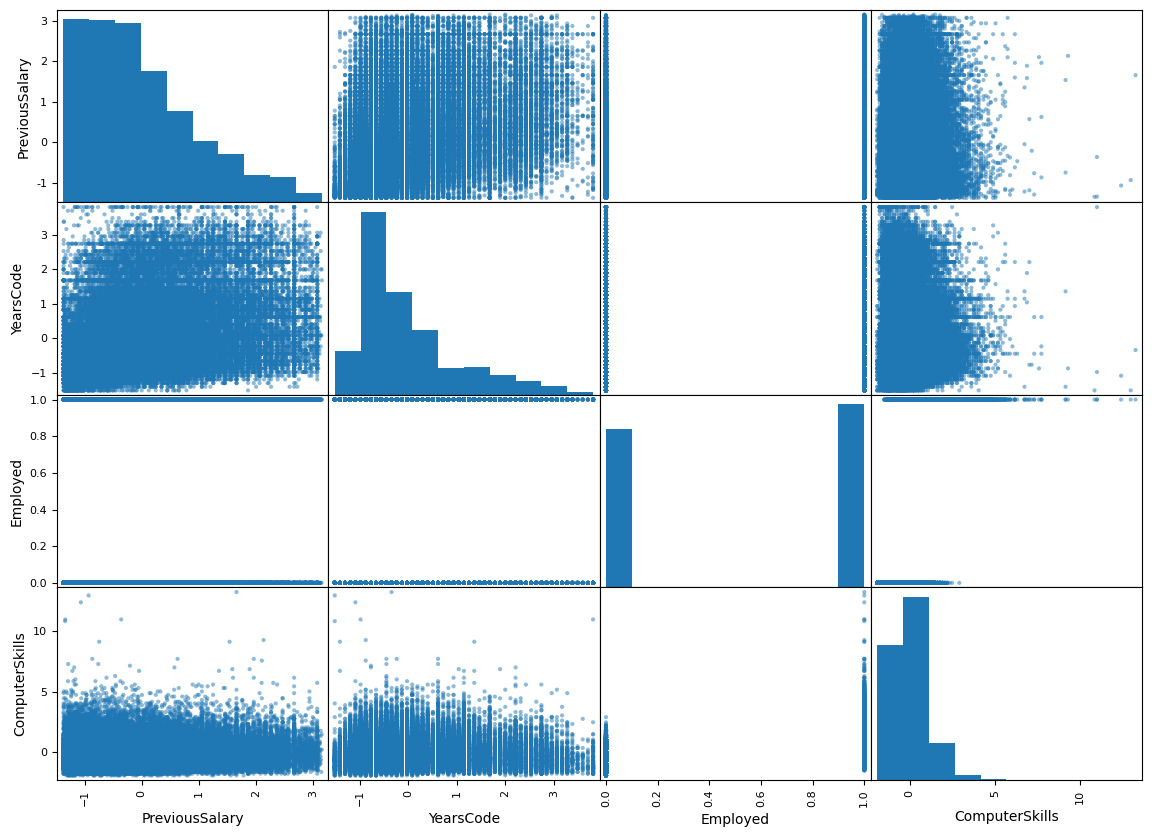

In [54]:
from pandas.plotting import scatter_matrix

attributes = ['PreviousSalary', 'YearsCode', 'Employed', 'ComputerSkills']

scatter_matrix(df_final[attributes], figsize=(14,10))
plt.show()

In [65]:
from sklearn.model_selection import train_test_split
X = df_final.drop('Employed', axis=1)
y = df_final['Employed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
#Logistic regression 
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [67]:
log_reg.score(X_test, y_test)

0.7907024230873945

In [43]:
from sklearn.metrics import r2_score

emp_pred1 = log_reg.predict(X_train)
emp_pred2 = log_reg.predict(X_test)

train_log_r2 = r2_score(y_train, emp_pred1)
test_log_r2 = r2_score(y_test, emp_pred2)

print('train r2: ', train_log_r2)
print('test r2: ', test_log_r2)

train r2:  0.12466216732137614
test r2:  0.15683732315401988


In [44]:
# Random Forest 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
forest_reg.score(X_test, y_test)

0.35188586569540203

In [46]:
# Gradient Boosting
grad_reg = GradientBoostingRegressor()
grad_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [47]:
grad_reg.score(X_test, y_test)

0.42763677691295043

In [48]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [49]:
knn_reg.score(X_test, y_test)

0.31301429544263015

In [50]:
from sklearn.linear_model import Lasso, Ridge

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

Ridge()

In [51]:
print(lasso_reg.score(X_test, y_test))
print(ridge_reg.score(X_test, y_test))

-0.00015022549466769952
0.3532513276924246


In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [73]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.7821359466383532


In [74]:
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)

print("Test Set Score:", test_score)

Test Set Score: 0.7903621018241219
